# Loading

In [1]:
!pip install scanpy
!pip install anndata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sccoda
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

In [2]:
import scanpy as sc
import anndata as ad

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
adata = sc.read('/content/drive/MyDrive/Gastric/NKT/Data/Gastric_NKT_anno.h5ad')

In [90]:
#绘图参数设置
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

# Component Analysis

In [98]:
adata

AnnData object with n_obs × n_vars = 12878 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [99]:
adata.obs.Person

AAACCTGTCTAACTTC-1-HP_POS_2    HP_POS_2
AAACGGGAGGCGCTCT-1-HP_POS_2    HP_POS_2
AAACGGGTCGATAGAA-1-HP_POS_2    HP_POS_2
AAAGATGAGGCATGGT-1-HP_POS_2    HP_POS_2
AAAGATGCAGGCTCAC-1-HP_POS_2    HP_POS_2
                                 ...   
TTCGAAGCACTCAGGC-1-HP_NEG_2    HP_NEG_2
TTCTTAGTCAACCATG-1-HP_NEG_2    HP_NEG_2
TTGCCGTAGAATTCCC-1-HP_NEG_2    HP_NEG_2
TTGCGTCGTTCGCTAA-1-HP_NEG_2    HP_NEG_2
TTGGCAATCTGCGGCA-1-HP_NEG_2    HP_NEG_2
Name: Person, Length: 12878, dtype: category
Categories (11, object): ['HP_NEG_1', 'HP_NEG_2', 'HP_NEG_3', 'HP_POS_2', ..., 'HP_POS_6', 'HP_POS_7',
                          'HP_POS_8', 'HP_POS_9']

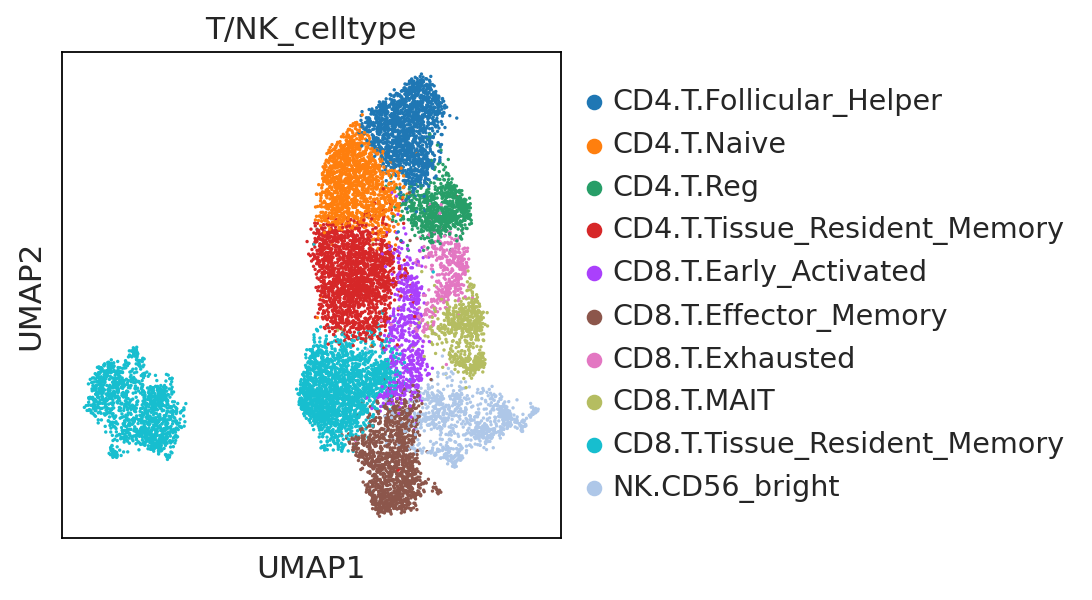

In [107]:
sc.pl.umap(adata,color=['T/NK_celltype'])

In [101]:
sc_color=['#7CBB5F',
 '#368650',
 '#A499CC',
 '#5E4D9A',
 '#78C2ED',
 '#866017',
 '#9F987F',
 '#E0DFED',
 '#EF7B77',
 '#279AD7',
 '#F0EEF0',
 '#1F577B',
 '#A56BA7',
 '#E0A7C8',
 '#E069A6',
 '#941456',
 '#FCBC10',
 '#EAEFC5',
 '#01A0A7',
 '#75C8CC',
 '#F0D7BC',
 '#D5B26C',
 '#D5DA48',
 '#B6B812',
 '#9DC3C3',
 '#A89C92',
 '#FEE00C',
 '#FEF2A1']

In [109]:
# 装载数据
data = adata[adata.obs['Person']=='HP_POS_2'].obs['T/NK_celltype'].value_counts().to_frame(name='HP_POS_2')
data['Neg'] = adata[adata.obs['Person']=='HP_POS_2'].obs['T/NK_celltype'].value_counts()
data = data.T
data = data.fillna(0)
data['Type'] = data.index
data_adata = dat.from_pandas(data, covariate_columns=["Type"])
print(data_adata.X)
print(data_adata.obs)
cell_index = data_adata.var.index

[[184. 153.  76.  71.  69.  59.  36.  10.   7.   6.]
 [184. 153.  76.  71.  69.  59.  36.  10.   7.   6.]]
              Type
HP_POS_2  HP_POS_2
Neg            Neg


/usr/local/lib/python3.8/dist-packages/sccoda/util/cell_composition_data.py:294: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return ad.AnnData(X=count_data.values,


In [116]:
# 装载数据
data = adata[adata.obs['Person']=='HP_POS_2'].obs['T/NK_celltype'].value_counts().to_frame(name='HP_POS_2')
for i in adata.obs['Person'].cat.categories:
  data[i] = adata[adata.obs['Person']==i].obs['T/NK_celltype'].value_counts()
data = data.T
data = data.fillna(0)
data = data.loc[adata.obs['Person'].cat.categories,:]
data = data.loc[:,cell_index]
data['Type'] = data.index
data_adata = dat.from_pandas(data, covariate_columns=["Type"])

print(data_adata.X)
print(data_adata.obs)
print(data_adata.var)

[[472.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [137.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [709.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [184. 153.  76.  71.  69.  59.  36.  10.   7.   6.]
 [ 81.  73.  32. 171. 221. 233.  57. 101. 128. 114.]
 [358. 125.  82. 332. 120.  83.  94. 218. 417. 484.]
 [264.  86.  18. 119. 222. 101.  36.  68. 285. 215.]
 [360. 117.  74. 513. 363.  88.  83. 182. 576. 460.]
 [251.  76.  37. 185.  53.  20. 129.  28.   9.  31.]
 [155. 113.  50. 228. 152.  32.  60.  75.  76.  79.]
 [346. 126.  25. 284. 173.  14. 120.  63.  83.  62.]]
              Type
HP_NEG_1  HP_NEG_1
HP_NEG_2  HP_NEG_2
HP_NEG_3  HP_NEG_3
HP_POS_2  HP_POS_2
HP_POS_3  HP_POS_3
HP_POS_4  HP_POS_4
HP_POS_5  HP_POS_5
HP_POS_6  HP_POS_6
HP_POS_7  HP_POS_7
HP_POS_8  HP_POS_8
HP_POS_9  HP_POS_9
Empty DataFrame
Columns: []
Index: [CD8.T.Tissue_Resident_Memory, NK.CD56_bright, CD8.T.Exhausted, CD4.T.Tissue_Resident_Memory, CD8.T.Effector_Memory, CD8.T.MAIT, CD8.T.Early_Activated, C

/usr/local/lib/python3.8/dist-packages/sccoda/util/cell_composition_data.py:294: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  return ad.AnnData(X=count_data.values,


In [119]:
type_color_rna={
    'CD8.T.Tissue_Resident_Memory':adata.uns['T/NK_celltype_colors'][0],
    'NK.CD56_bright':adata.uns['T/NK_celltype_colors'][1],
    'CD8.T.Exhausted':adata.uns['T/NK_celltype_colors'][2],
    'CD4.T.Tissue_Resident_Memory':adata.uns['T/NK_celltype_colors'][3],
    'CD8.T.Effector_Memory':adata.uns['T/NK_celltype_colors'][4],
    'CD8.T.MAIT':adata.uns['T/NK_celltype_colors'][5],
    'CD8.T.Early_Activated':adata.uns['T/NK_celltype_colors'][6],
    'CD4.T.Reg':adata.uns['T/NK_celltype_colors'][7],
    'CD4.T.Follicular_Helper':adata.uns['T/NK_celltype_colors'][8],
    'CD4.T.Naive':adata.uns['T/NK_celltype_colors'][9],
}
adata.uns['T/NK_celltype_colors']=adata.obs['T/NK_celltype'].cat.categories.map(type_color_rna).values.tolist()


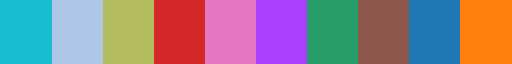

In [112]:
ListedColormap(adata.uns['T/NK_celltype_colors'])

Text(0.5, 1.0, 'scRNA-seq')

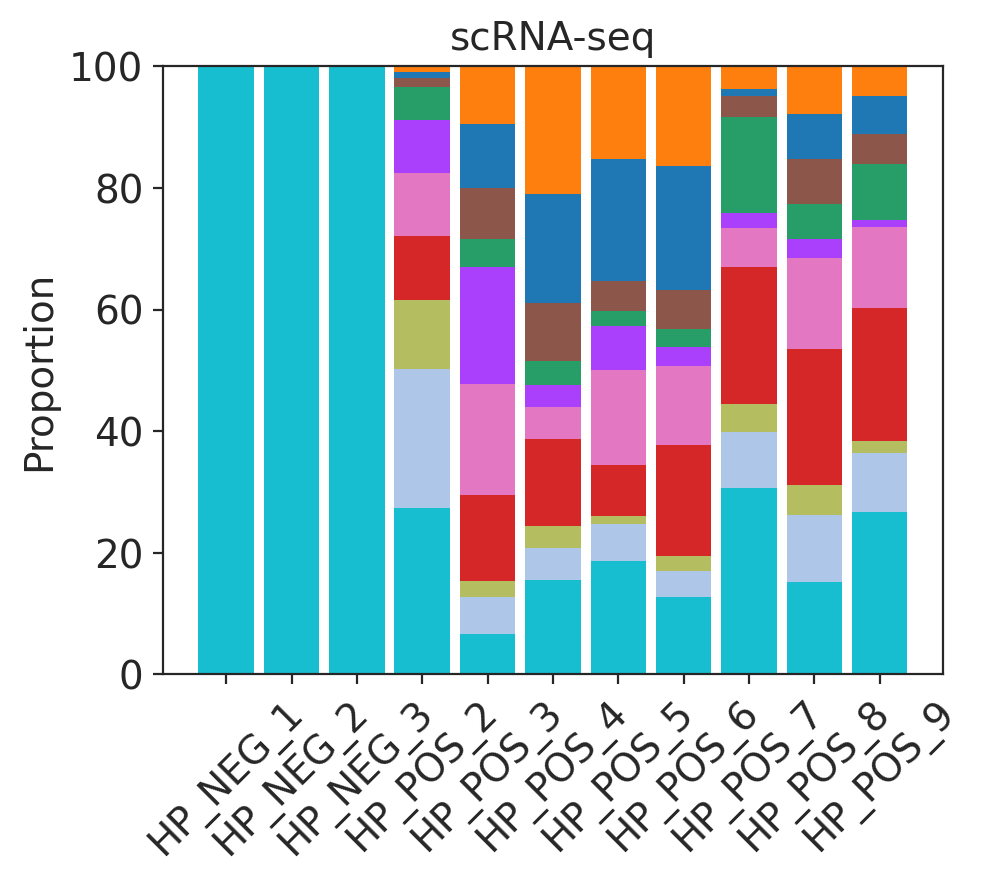

In [117]:
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt
sns.set_style("ticks") #设置全局主题
#type_color_T = [sc_color[11],sc_color[18],sc_color[14],sc_color[15],sc_color[8],sc_color[3],sc_color[26],sc_color[21],sc_color[24],sc_color[0]]
viz.stacked_barplot(data_adata, feature_name="samples",figsize=(5,4),plot_legend=False,cmap=ListedColormap(adata.uns['T/NK_celltype_colors'])
)

plt.title("scRNA-seq") #设置标题
#plt.savefig("celltype_prop_A_2.png",dpi=300,bbox_inches = 'tight')
#plt.savefig("/content/drive/MyDrive/Breast_Cancer/Tcell_Figure/celltype_prop_A_2.png",dpi=300,bbox_inches = 'tight')

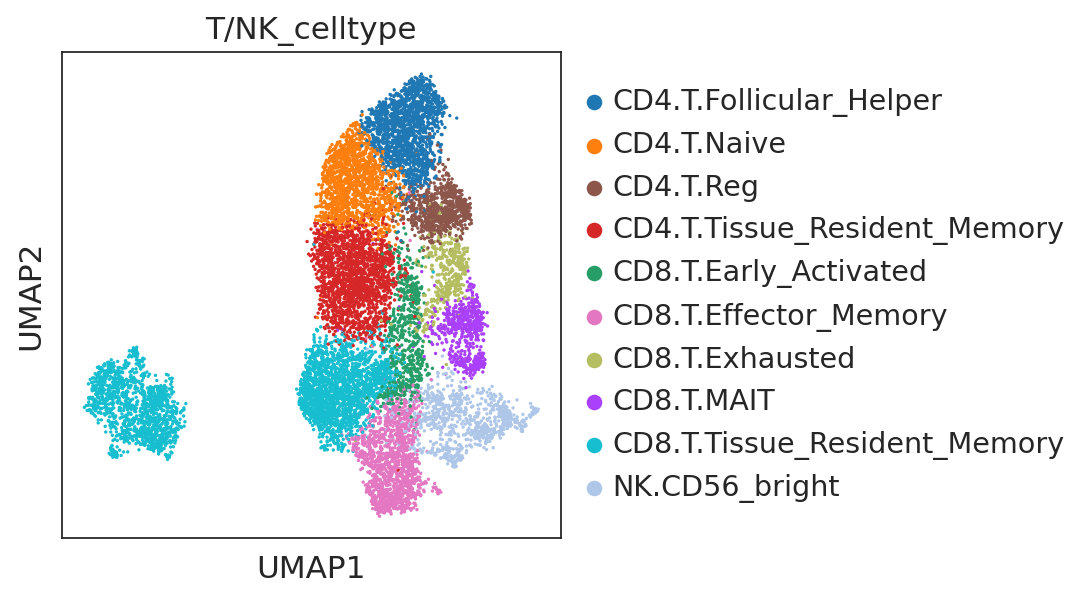

In [121]:
sc.pl.umap(adata,color=['T/NK_celltype'])

## 箱线图

参考：https://starlitnightly.github.io/bioinformatic_tutorial/PLOT/plot_2.html

In [ ]:
#获取箱子位置的函数，如果是两个箱子，那么其应该是在坐标两侧根据width分隔
#如果是三个箱子，那么坐标的位置箱子width各占一半，再根据width进行分隔
#设置间距函数
def ticks_range(x,width):
    nticks=[]
    pticks=[]
    start=-0
    end=0
    for i in range(x//2):
        nticks.append(start-width)
        start-=width
        pticks.append(end+width)
        end+=width
    if x%2==0:
        ticks=nticks+pticks
    elif x%2==1:
        ticks=nticks+[0]+pticks
    return ticks

In [ ]:
import random
import matplotlib.patches as mpatches

data = adata.obs

#获取需要分割的数据
hue='T/NK_celltype'
hue_datas=list(set(data[hue]))

#获取箱线图的横坐标
x='Sample'
ticks=list(set(data[x]))

#在这个数据中，我们有6个不同的癌症，每个癌症都有2个基因（2个箱子）
#所以我们需要得到每一个基因的6个箱线图位置，6个散点图的抖动
plot_data1={}#字典里的每一个元素就是每一个基因的所有值
plot_data_random1={}#字典里的每一个元素就是每一个基因的随机20个值
plot_data_xs1={}#字典里的每一个元素就是每一个基因的20个抖动值


#箱子的参数
width=0.4 # 箱子的间隔
length = 0.3 # 箱子的宽度
y='dpt'
for hue_data,num in zip(hue_datas,ticks_range(len(hue_datas),width)):
    data_a=[]
    data_a_random=[]
    data_a_xs=[]
    for i,k in zip(ticks,range(len(ticks))):
        test_data=data.loc[((data[x]==i)&(data[hue]==hue_data)),y].tolist()
        data_a.append(test_data)
        if len(test_data)<50:
            data_size=len(test_data)
        else:
            data_size=50
        random_data=random.sample(test_data,data_size)
        data_a_random.append(random_data)
        data_a_xs.append(np.random.normal(k*len(hue_datas)+num, 0.04, len(random_data)))
    #data_a=np.array(data_a)
    data_a_random=np.array(data_a_random)
    plot_data1[hue_data]=data_a 
    plot_data_random1[hue_data]=data_a_random
    plot_data_xs1[hue_data]=data_a_xs

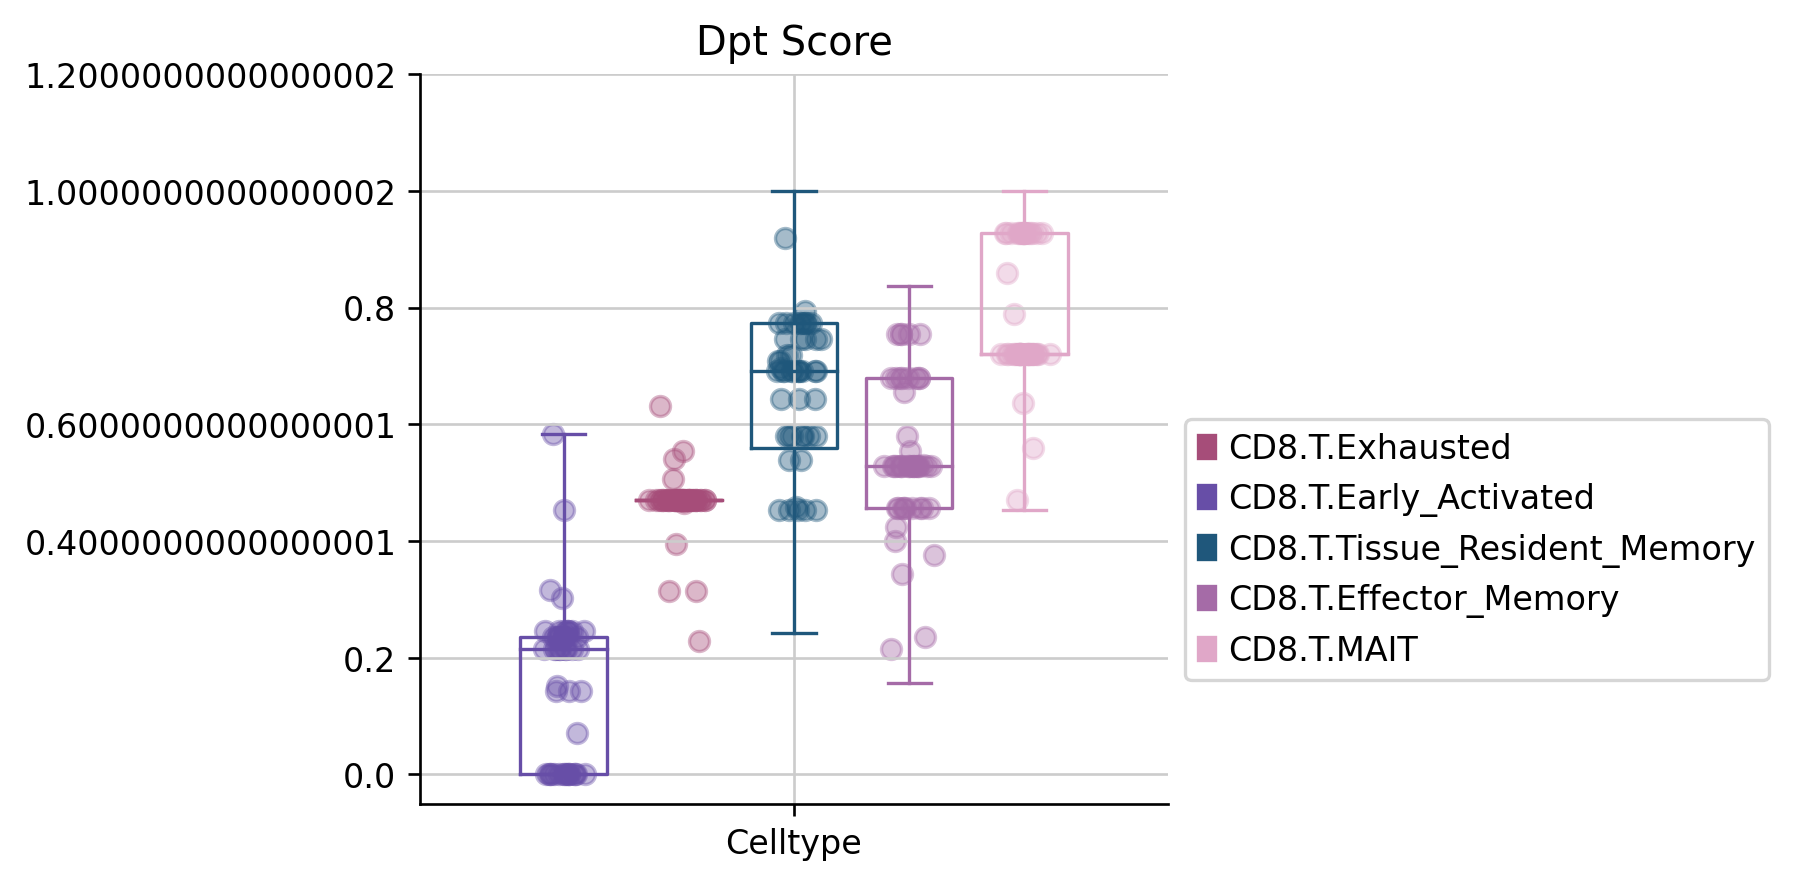

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
#色卡
palette=['#a64d79','#674ea7','#1F577B', '#A56BA7', '#E0A7C8']
#绘制箱线图
for hue_data,hue_color,num in zip(hue_datas,palette,ticks_range(len(hue_datas),width)):
    b1=ax.boxplot(plot_data1[hue_data], 
                  positions=np.array(range(len(ticks)))*len(hue_datas)+num, 
                  sym='', 
                  widths=length,)
    plt.setp(b1['boxes'], color=hue_color)
    plt.setp(b1['whiskers'], color=hue_color)
    plt.setp(b1['caps'], color=hue_color)
    plt.setp(b1['medians'], color=hue_color)

    clevels = np.linspace(0., 1., len(plot_data_random1[hue_data]))
    for x, val, clevel in zip(plot_data_xs1[hue_data], plot_data_random1[hue_data], clevels):
        plt.scatter(x, val,c=hue_color,alpha=0.4)

#坐标轴字体
fontsize=10
#修改横坐标
ax.set_xticks(range(0, len(ticks) * len(hue_datas), len(hue_datas)), ['Celltype'],fontsize=fontsize)
#修改纵坐标
yticks=ax.get_yticks()
ax.set_yticks(yticks[yticks>=0],yticks[yticks>=0],fontsize=fontsize)


# 标签生成
labels = hue_datas  #legend标签列表，上面的color即是颜色列表
color = palette
#用label和color列表生成mpatches.Patch对象，它将作为句柄来生成legend
patches = [ mpatches.Patch(color=color[i], label="{:s}".format(labels[i]) ) for i in range(len(hue_datas)) ] 
ax.legend(handles=patches,bbox_to_anchor=(1, 0.55), ncol=1,fontsize=fontsize)

#设置标题
ax.set_title('Dpt Score',fontsize=fontsize+2)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

#fig.savefig(current_path+"figures/fig_boxplot.png",dpi=300,bbox_inches = 'tight')

# Component Analysis

## Pos_2

In [122]:
adata_Pos_2 = adata[adata.obs.Person=='HP_POS_2']
adata_Pos_2

View of AnnData object with n_obs × n_vars = 671 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

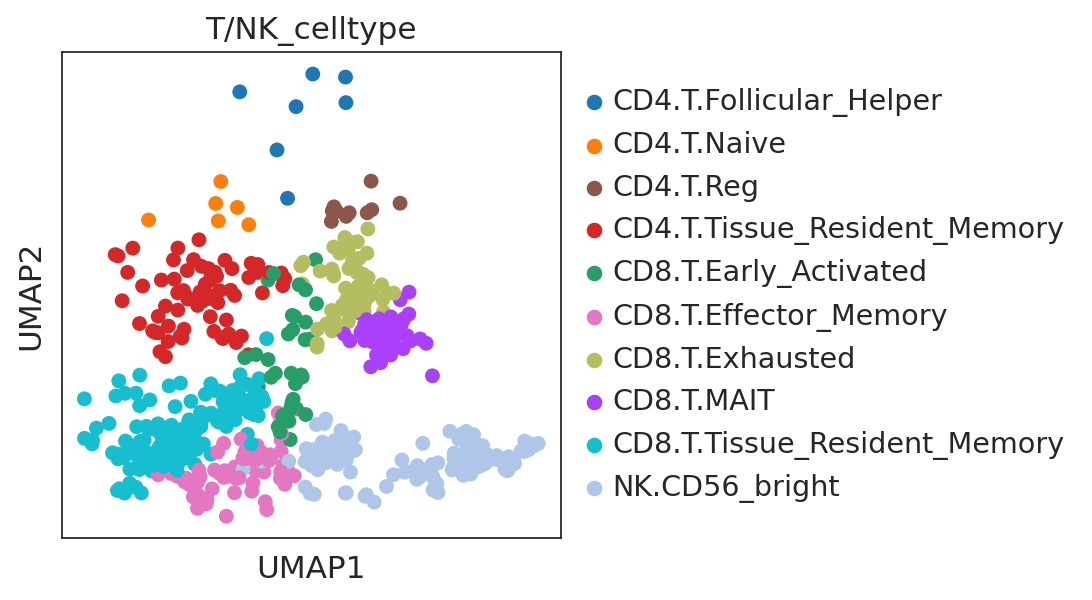

In [123]:
sc.pl.umap(adata_Pos_2,color=['T/NK_celltype'])

## Pos_3

In [124]:
adata_Pos_3 = adata[adata.obs.Person=='HP_POS_3']
adata_Pos_3

View of AnnData object with n_obs × n_vars = 1211 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


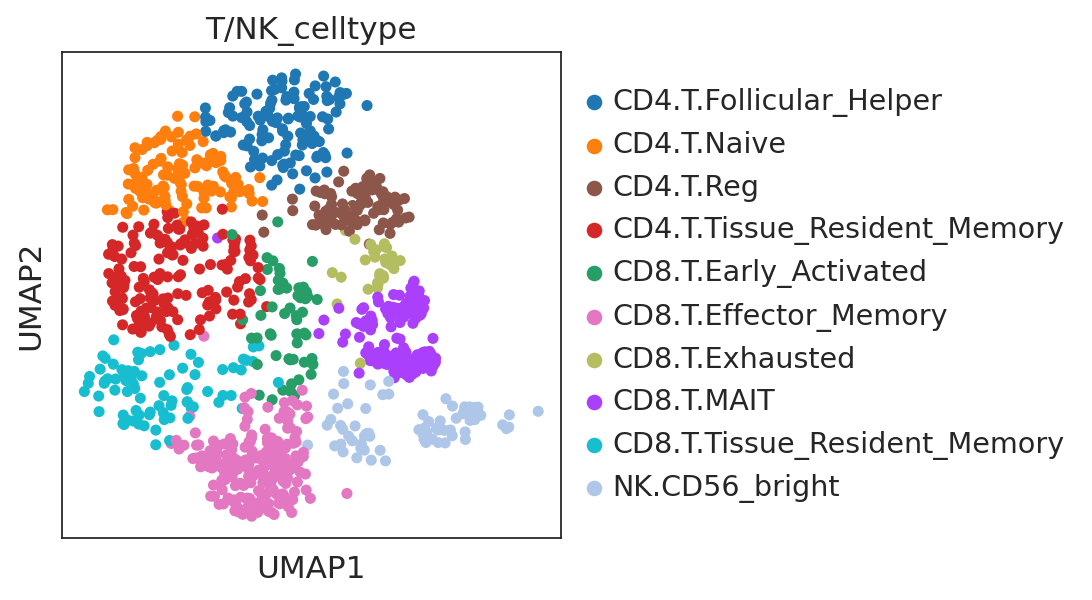

In [138]:
sc.pl.umap(adata_Pos_3,color=['T/NK_celltype'])

## Pos_4

In [151]:
adata_Pos_4 = adata[adata.obs.Person=='HP_POS_4']
adata_Pos_4

View of AnnData object with n_obs × n_vars = 2313 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

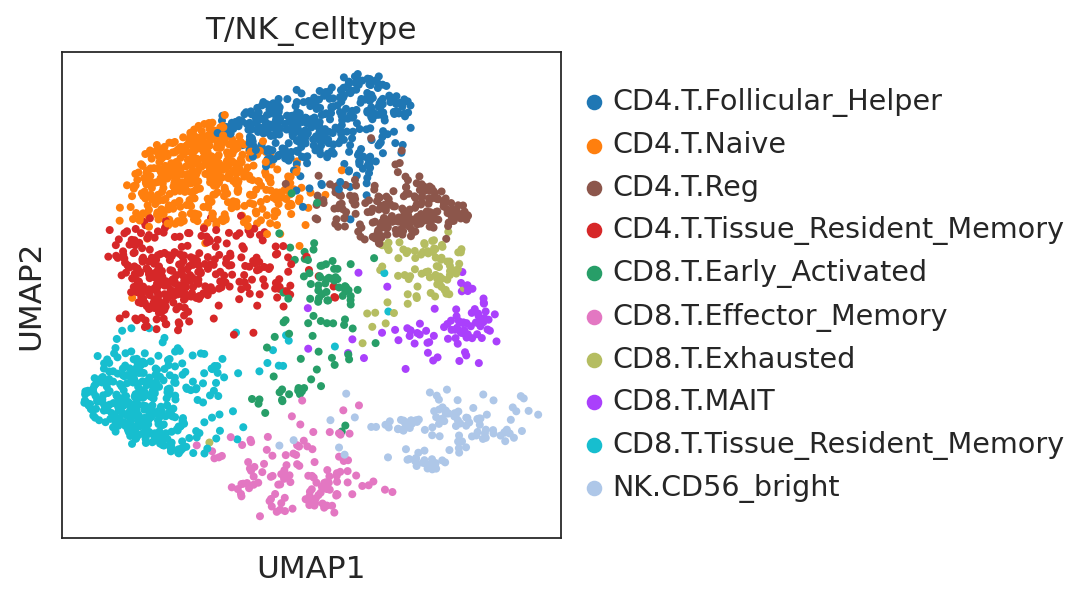

In [152]:
sc.pl.umap(adata_Pos_4,color=['T/NK_celltype'])

## Pos_5

In [153]:
adata_Pos_5 = adata[adata.obs.Person=='HP_POS_5']
adata_Pos_5

View of AnnData object with n_obs × n_vars = 1414 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

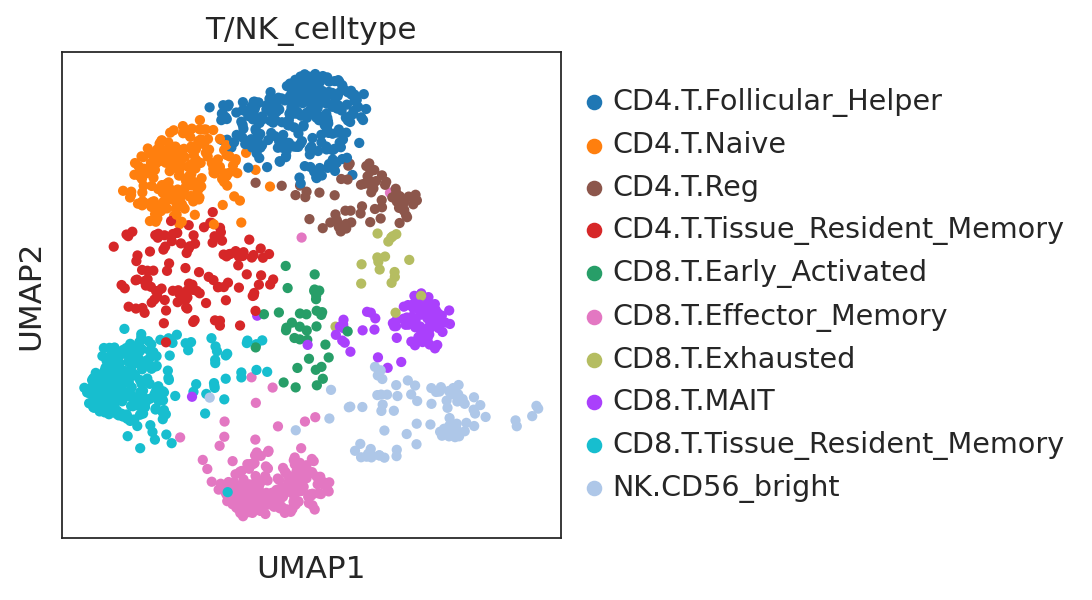

In [154]:
sc.pl.umap(adata_Pos_5,color=['T/NK_celltype'])

## Pos_6

In [143]:
adata_Pos_6 = adata[adata.obs.Person=='HP_POS_6']
adata_Pos_6

View of AnnData object with n_obs × n_vars = 2816 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

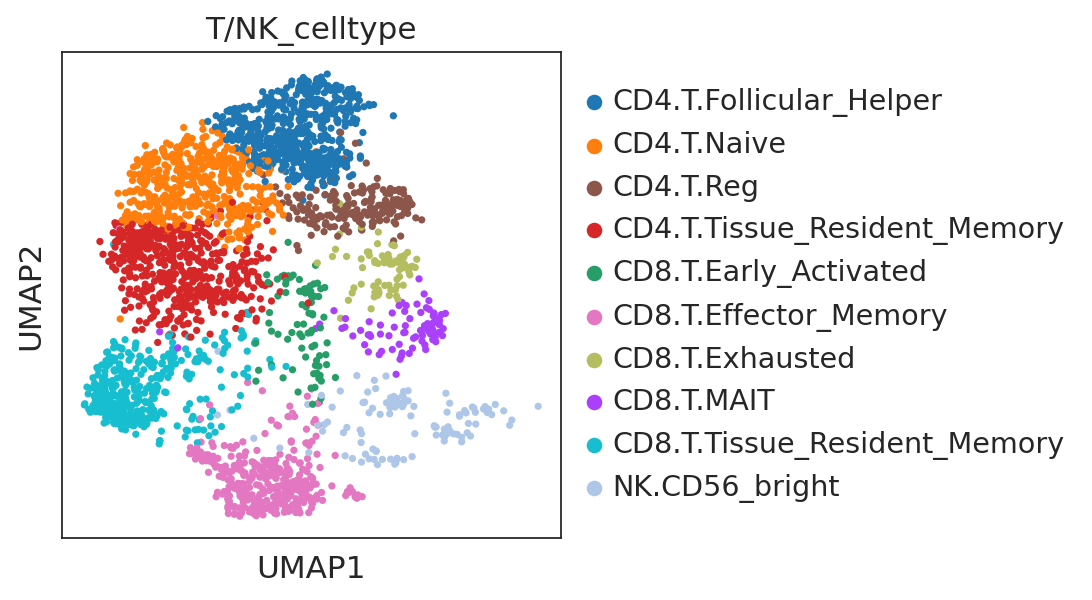

In [144]:
sc.pl.umap(adata_Pos_6,color=['T/NK_celltype'])

## Pos_7

In [145]:
adata_Pos_7 = adata[adata.obs.Person=='HP_POS_7']
adata_Pos_7

View of AnnData object with n_obs × n_vars = 819 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

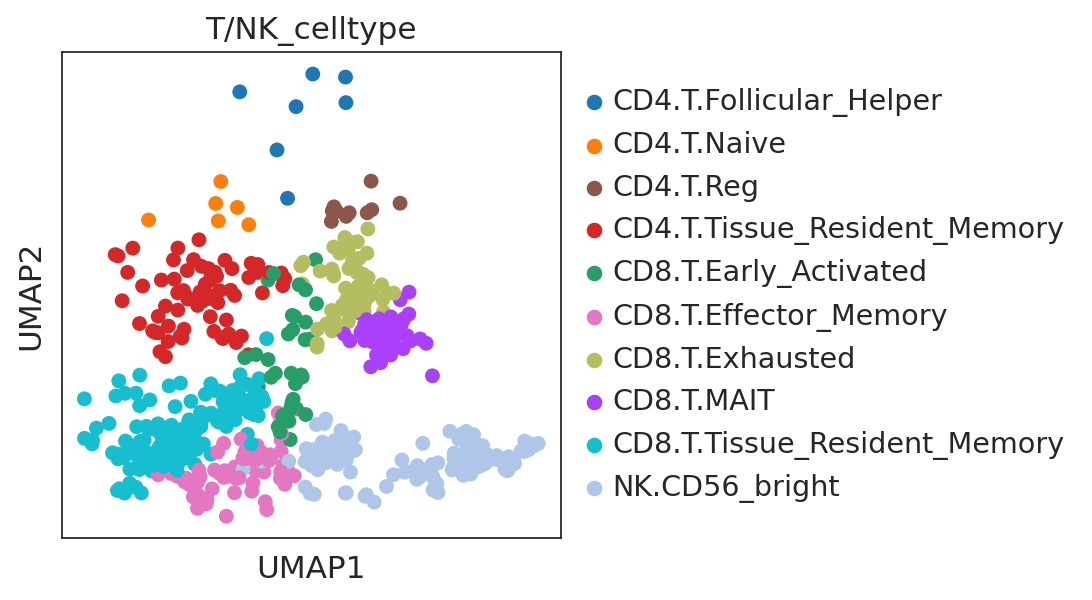

In [146]:
sc.pl.umap(adata_Pos_2,color=['T/NK_celltype'])

## Pos_8

In [155]:
adata_Pos_8 = adata[adata.obs.Person=='HP_POS_8']
adata_Pos_8

View of AnnData object with n_obs × n_vars = 1020 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

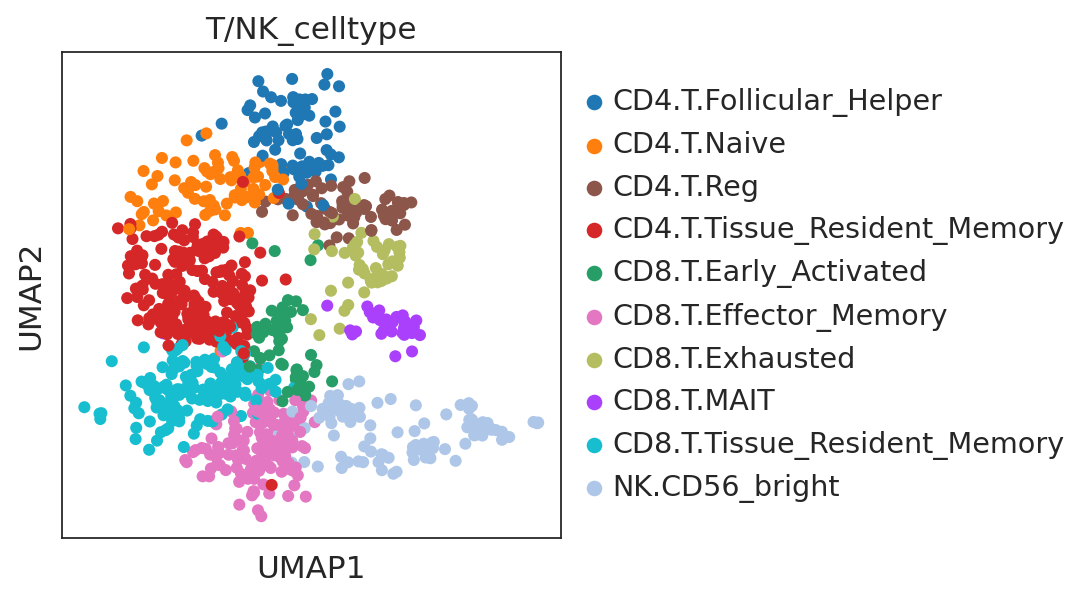

In [156]:
sc.pl.umap(adata_Pos_8,color=['T/NK_celltype'])

## Pos_9

In [149]:
adata_Pos_9 = adata[adata.obs.Person=='HP_POS_9']
adata_Pos_9

View of AnnData object with n_obs × n_vars = 1296 × 2000
    obs: 'Person', 'Sample', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'T/NK_celltype', 'T/NK_type'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Person_colors', 'Sample_colors', 'T', 'dendrogram_Person', 'dendrogram_T', 'dendrogram_leiden', 'dendrogram_major_celltype', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'log1p', 'major_celltype_colors', 'neighbors', 'paga', 'pca', 'umap', 'T/NK_celltype_colors'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

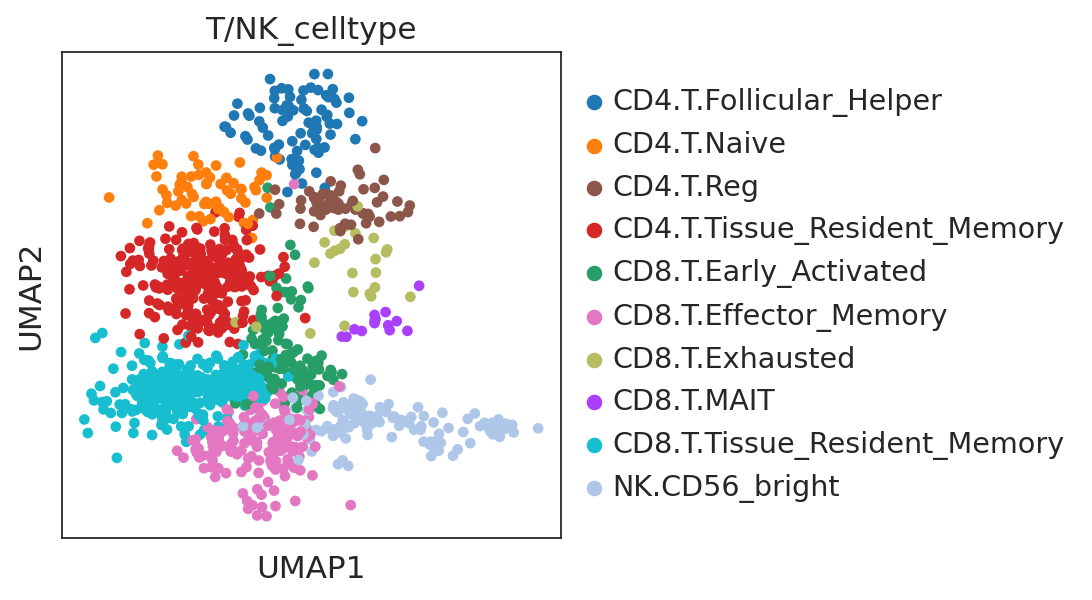

In [150]:
sc.pl.umap(adata_Pos_9,color=['T/NK_celltype'])